# **Projeto Final: Análise de Dados - Grupo 4**

Utilizaremos o DataSet "*Preços dos Carros no Brasil*".

Nosso objetivo é verificar se existe alguma conexão das variáveis nas relações:
* Tempo x Preço Médio
* Tamanho do Motor x Combustível
* Marca x Preço Médio

## Tratamento de Dados

In [293]:
# Importando as Bibliotecas

import pandas as pd
import numpy as np

In [294]:
# Lendo o DataFrame e Analisando as Variáveis

df = pd.read_csv("fipe_cars.csv")

print(df.head(), df.dtypes, df.shape, sep="\n\n")


   year_of_reference month_of_reference fipe_code authentication  brand   
0               2021            January  038001-6     tlp4qry07m  Acura  \
1               2021            January  038001-6     s1wksdv9by  Acura   
2               2021            January  038001-6     skrbcfnkch  Acura   
3               2021            January  038001-6     rxzh76d5db  Acura   
4               2021            January  038001-6     qrm322tpd8  Acura   

     model      fuel    gear  engine_size  year_model  avg_price_brl  
0  NSX 3.0  Gasoline  manual          3.0        1995        40374.0  
1  NSX 3.0  Gasoline  manual          3.0        1994        38939.0  
2  NSX 3.0  Gasoline  manual          3.0        1993        37648.0  
3  NSX 3.0  Gasoline  manual          3.0        1992        35962.0  
4  NSX 3.0  Gasoline  manual          3.0        1991        32863.0  

year_of_reference       int64
month_of_reference     object
fipe_code              object
authentication         object
br

In [295]:
# Limpeza dos Dados

print(df.isna().sum())  # Não temos valores NaN!

df = df.drop(["fipe_code", "authentication", "gear", "year_model"], axis=1)  # Retirando as colunas desnecessárias para a nossa análise

df.head()

year_of_reference     0
month_of_reference    0
fipe_code             0
authentication        0
brand                 0
model                 0
fuel                  0
gear                  0
engine_size           0
year_model            0
avg_price_brl         0
dtype: int64


,year_of_reference,month_of_reference,brand,model,fuel,engine_size,avg_price_brl
0,2021,January,Acura,NSX 3.0,Gasoline,3.0,40374.0
1,2021,January,Acura,NSX 3.0,Gasoline,3.0,38939.0
2,2021,January,Acura,NSX 3.0,Gasoline,3.0,37648.0
3,2021,January,Acura,NSX 3.0,Gasoline,3.0,35962.0
4,2021,January,Acura,NSX 3.0,Gasoline,3.0,32863.0


In [296]:
# Identificando linhas duplicadas e eliminando-as.

print(df.duplicated().sum())
df.loc[df.duplicated()]

4


,year_of_reference,month_of_reference,brand,model,fuel,engine_size,avg_price_brl
135875,2021,June,Renault,DUSTER OROCH Dyna. 2.0 Flex 16V Mec.,Gasoline,2.0,69893.0
215184,2021,October,GM - Chevrolet,A-10 2.5/4.1,Gasoline,2.5,8879.0
383231,2022,May,GM - Chevrolet,Monza Classic SE 2.0 /MPFI e EFI 2p e 4p,Gasoline,2.0,10655.0
559711,2022,December,Ford,Ranger Limited 3.0 PSE 4x4 CD TB Diesel,Diesel,3.0,64638.0


In [297]:
df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [298]:
# Nova dimensão do DataFrame após a limpeza de dados.
print(df.shape)

(599003, 7)


In [299]:
# Fundindo as colunas "year_of_reference" e "mounth_of_referece" como datas do tipo datetime.

mapeamento = {'January': "1", 'February': "2",  'March': "3", 'April': "4", 'May': "5", 'June':
              "6", 'July': "7", 'August': "8", 'September': "9", 'October': "10", 'November': "11", 'December': "12"}

df["month_of_reference"] = df["month_of_reference"].map(mapeamento)  # Transformando as strings do mês com o número correspondente

df["year_of_reference"] = df["year_of_reference"].astype(str)  # Transformando os anos em strings

df["date"] = df["month_of_reference"].str.cat(df["year_of_reference"], sep="/")  # Juntando os valores no formato de data

df["date"] = pd.to_datetime(df["date"], format="%m/%Y").dt.strftime('%Y/%m')  # Transformando em datetime

df = df.drop(columns=["month_of_reference", "year_of_reference"])  # Retirando as colunas que usamos

df

,brand,model,fuel,engine_size,avg_price_brl,date
0,Acura,NSX 3.0,Gasoline,3.0,40374.0,2021/01
1,Acura,NSX 3.0,Gasoline,3.0,38939.0,2021/01
2,Acura,NSX 3.0,Gasoline,3.0,37648.0,2021/01
3,Acura,NSX 3.0,Gasoline,3.0,35962.0,2021/01
4,Acura,NSX 3.0,Gasoline,3.0,32863.0,2021/01
...,...,...,...,...,...,...
599002,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,1.6,22790.0,2023/01
599003,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,1.6,22169.0,2023/01
599004,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,1.6,21565.0,2023/01
599005,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,1.6,20978.0,2023/01


## Visualização de Dados

In [300]:
# Importando as Bibliotecas

import seaborn as sns
import plotly.express as px

### *Tempo x Preço Médio*

<Axes: ylabel='avg_price_brl'>

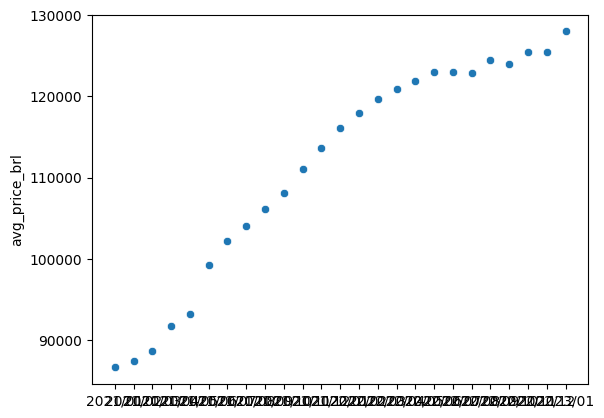

In [304]:
medias_data = df.groupby("date")["avg_price_brl"].mean()

datas = df["date"].unique()

sns.scatterplot(x=datas, y=medias_data)